# Computational Social Science Project #3 
Group members: Shruti Bathia, Jessie Harney, Lawrence Liu, & Alex Ramiller

Date: 11/20/2020

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



# Make sure to import other libraries that will be necessary for training models!

After importing the necessary libraries, we read in the inspections data from 2011-2013 and the inspections data from 2014. The models will be trained on the 2011-2013 data, and we will later predict on the 2014 data. 

In [3]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv")

/Users/shrutibathia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [5]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [6]:
#Get a sense for the levels of the categorical variables
print("Facility Types:", chicago_inspections_2011_to_2013["Facility_Type_Clean"].unique())
print("Inspection Types:", chicago_inspections_2011_to_2013["Inspection_Type"].unique())
print("Application Types:", chicago_inspections_2011_to_2013["APPLICATION_TYPE"].unique())

Facility Types: ['Other' 'Restaurant']
Inspection Types: ['Canvass']
Application Types: ['RENEW' 'ISSUE' nan 'C_LOC' 'C_EXPA']


In [7]:
# Drop column names related to geography, identification, variables with no variation, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                'License',
                                                'Facility_Type', #Removed by us
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                'LICENSE_TERM_START_DATE',
                                                'LICENSE_TERM_EXPIRATION_DATE',
                                                'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                 'Inspection_Type', #Removed by us, looks like they are all canvass
                                                'WARD',
                                                'PRECINCT',
                                                'WARD_PRECINCT', #Removed by us
                                                'POLICE_DISTRICT',
                                                'LICENSE_CODE',
                                                'LICENSE_DESCRIPTION', #Removed by us
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

#assign inspection ID and the establishment name to be our index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

In [8]:
chicago_inspections_2011_to_2013.head()

,,Inspection_Date,Risk,Results,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,APPLICATION_TYPE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,2013-01-31,Risk 3 (Low),Pass,Other,0,0,2,0,0,0,0,2.0,1,RENEW,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
507211,PANERA BREAD,2011-10-18,Risk 1 (High),Pass,Restaurant,0,0,3,0,0,0,0,2.0,1,RENEW,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
507212,LITTLE QUIAPO RESTAURANT,2011-10-18,Risk 1 (High),Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,RENEW,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
507216,SERGIO'S TAQUERIA PIZZA INC.,2011-10-19,Risk 1 (High),Pass,Restaurant,0,0,6,0,0,0,0,2.0,1,RENEW,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
507219,TARGET STORE # T-2079,2011-10-20,Risk 2 (Medium),Fail,Restaurant,0,2,6,0,0,0,0,2.0,1,RENEW,2006-07-07,2018-02-15,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0


## Visualization

What do inspections look like over time?

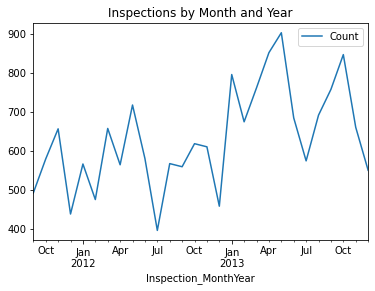

In [9]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type_Clean': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

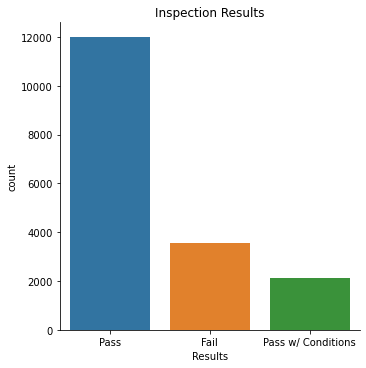

In [10]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

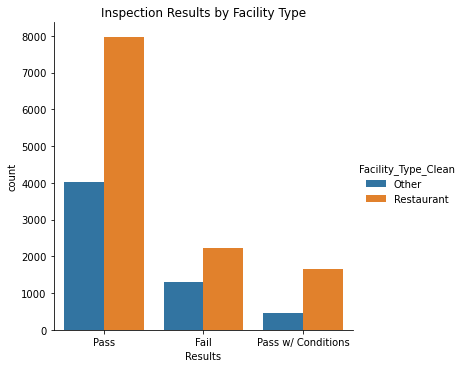

In [11]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

Now that we have a sense for what is included in the dataset, we prepare the data for model fitting. We begin by dropping variables related to the date of inspection and dummify the categorical variables in the dataset. Additionally, we convert the target variable ("Results") into a binary variable. Instead of having Pass, Pass with Conditions, and Fail, we treat Pass and Pass with Conditions the same. Reducing the number of possible classes will be less computationally intensive without hindering our ability to predict the establishments likely to fail an inspection. 

In [12]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

# Binarize the results variable, and treat Pass and Pass w/ Conditions the same.
# I like the idea of making pass w/ conditions and pass the same for our purposes here. But let me know if y'all disagree! -LL
# @LL - Agreed! Given our goal is to identify the riskiest locations, I'm definitely on board with focusing on pass/no pass! -JH
chicago_inspections_2011_to_2013["Results"] = chicago_inspections_2011_to_2013['Results']
chicago_inspections_2011_to_2013["Results"] = chicago_inspections_2011_to_2013["Results"].replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
chicago_inspections_2011_to_2013["Results"]  = lb_style.fit_transform(chicago_inspections_2011_to_2013["Results"])
# Recode 0s and 1s so 1s are "Fail"
chicago_inspections_2011_to_2013["Results"] = np.where(chicago_inspections_2011_to_2013["Results"] == 1, 0 ,1)

#Dummify remaining categorical variables
chicago_inspections_2011_to_2013 = pd.get_dummies(chicago_inspections_2011_to_2013)


# QUESTION FROM LL, 11/13/20

Do we want to try and do feature selection? For the last project, my team checked to see which features were more highly correlated with the target variable and preliminarily dropped those that either had low correlation w/ the target (< 0.3) or were highly collinear with each other. Not sure if we also wanted to do that here? I know we're not asked to do feature selection, but am I right in thinking it might still be helpful for a more interpretable model? The response could be that we're not really worried about interpretability here, and the choice of what is considered "highly correlated" is an arbitrary cutoff anyway. Also, I could see us wanting to keep as much data as posisble if the goal is to make the best prediction possible with all the data we have. For now, I'm thinking maybe we don't do feature selection but am open to your thoughts. -LL

In [13]:
chicago_inspections_2011_to_2013.head()

,,Results,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,0,2,0,0,0,0,2.0,1,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,0,3,0,0,0,0,2.0,1,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,1,0,2,6,0,0,0,0,2.0,1,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,0,6,0,0,0,0,2.0,1,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,0,1,0,0,0,1
507219,TARGET STORE # T-2079,1,0,2,6,0,0,0,0,2.0,1,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,0,1,0,0,0,1


## Dividing Data into Training and Validation Sets

In [14]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])

In [15]:
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,0,1,0,0,0,1


In [16]:
#split data into train and validate datasets
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size = 0.8, test_size = 0.2,
                                           stratify=y, random_state = 10)

In [17]:
#Scale features

scaler = StandardScaler()
# Fit only to the training data
X_train_scaled = scaler.fit_transform(X_train)
X_validate_scaled = scaler.fit_transform(X_validate)

## Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

### Model X: Random Forest

## Placeholder for description of random forest model. Can consider whether we want to use the random forest to create a reduced decision tree like we did for lab

In [18]:
##Commenting out lines below so we don't have to run cell every time while building out notebook b/c takes 1.5 hours
#Uncomment before submission to make sure it all still works. For now, can just run cell below. --LL
## Hyperparemter Tuning

## Function to measure the quailty of the split
#criterion = ['gini', 'entropy']
## Number of trees in random forest
#n_estimators = list(np.arange(50,150,25))
## Number of features to consider at every split
#max_features = ['auto', 'sqrt', 'log2']
## Maximum number of levels in tree
#max_depth = list(np.arange(2,5,1)) 
## Minimum number of samples required to split a node
#min_samples_split = list(np.arange(2,5,1)) 
## Minimum number of samples required at each leaf node
#min_samples_leaf = list(np.arange(1, 5, 1))
## Node will be split if split induces decrease of impurity greater than or equal to this value
#min_impurity_decrease = list(np.arange(0,0.10,0.01)) 

## Create the random grid
#param_grid = {'criterion': criterion, 
#              'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#              'min_impurity_decrease': min_impurity_decrease}


## Use the random grid to search for best hyperparameters
## First create the base model to tune
#rf = RandomForestClassifier()

## Random search of parameters, using 3 fold cross validation, 
## search across 100 different combinations, and use all available cores
#rf_grid = GridSearchCV(rf,param_grid, cv = 3, n_jobs= -1, verbose = 2)
#rf_grid.fit(X_train_scaled, y_train)

#best_index = np.argmax(rf_grid.cv_results_["mean_test_score"])

#print(rf_grid.cv_results_["params"][best_index])

In [19]:
# Fit the RF Classifier with the tuned hyperparameters
##Commenting out line below so we don't have to run above cell every time while building out notebook
#Uncomment before submission
#rf_fit = RandomForestClassifier(**rf_grid.cv_results_["params"][best_index]).fit(X_train_scaled, y_train)
rf_fit = RandomForestClassifier(criterion = 'entropy',
                               max_depth = 4,
                               max_features = 'auto',
                               min_impurity_decrease = 0.0,
                               min_samples_leaf = 2,
                               min_samples_split = 2,
                               n_estimators = 50).fit(X_train_scaled, y_train)

Now that we have tuned the hyperparameters and fit the model, we can see which features contributed most to the classification. 

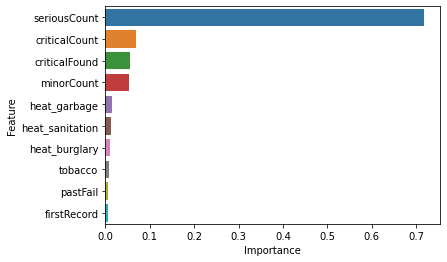

In [20]:
import seaborn as sns

feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_fit.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

## Model Y: Support Vector Machine

In [21]:
## Hyperparemter Tuning

# Choice of regularization parameter (must be strictly positive, larger values of C indicate
# weaker regularization strength)
C = list(np.arange(0.1,2.1,0.5))
# Kernel type
kernel = ['linear', 'poly', 'rbf']
# Kernel coefficient specification 
gamma = ['auto', 'scale']
# Whether to apply the shrinking heuristic
shrinking = [True, False]
# Maximum number of iterations
max_iter = list(np.arange(1000, 10000, 1000))

# Create the random grid
param_gridSVM = {'C': C, 
              'kernel': kernel,
               'gamma': gamma,
               'shrinking': shrinking,
               'max_iter': max_iter}

# Import SVC from sklearn
from sklearn.svm import SVC

# create a model
svm = SVC()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svm_grid = GridSearchCV(svm, param_gridSVM, cv = 3, n_jobs= -1, verbose = 2)
svm_grid.fit(X_train_scaled, y_train)

best_indexSVM = np.argmax(svm_grid.cv_results_["mean_test_score"])

print(svm_grid.cv_results_["params"][best_indexSVM])


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 34.1min finished


{'C': 0.6, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': 4000, 'shrinking': True}


/Users/shrutibathia/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [22]:
# Fit the best SVM model
svm_fit = SVC(**svm_grid.cv_results_["params"][best_indexSVM]).fit(X_train_scaled, y_train)

# Predicted outcome from best SVM (with hypertuned parameters)
y_predSVM = svm_fit.predict(X_validate)

/Users/shrutibathia/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


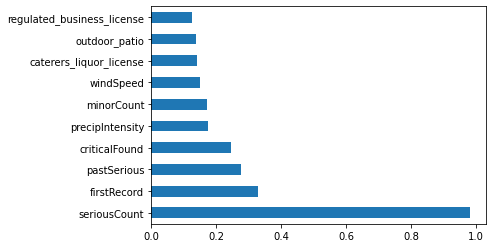

In [23]:
# Cannot do the same type of feature selection for SVM, but can do this! 
# Source: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
pd.Series(abs(svm_fit.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

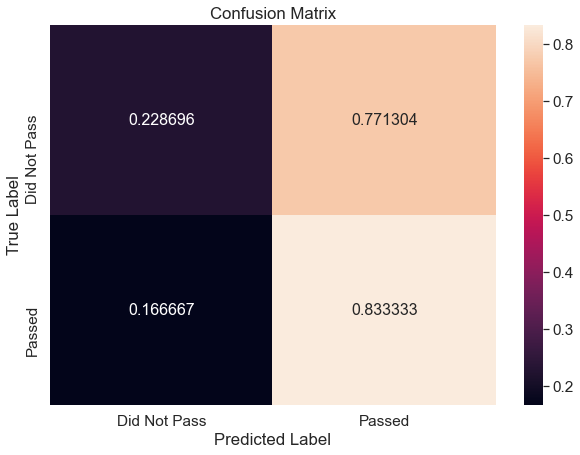

In [24]:
##### For wherever we want to put this, the confusion matrix for the SVM
# Import confusion_matrix from sklearn 
from sklearn.metrics import confusion_matrix

# Create a confusion matrix with our validated and predicated outcome
cf_matrixSVC = confusion_matrix(y_validate, y_predSVM, normalize = "true")

# Create a pandas dataframe version of the confusion matrix
df_cmSVC = pd.DataFrame(cf_matrixSVC, range(2), range(2))

df_cmSVC = df_cmSVC.rename(index=str, columns={0: "Did Not Pass", 1: "Passed"})
df_cmSVC.index = ["Did Not Pass", "Passed"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cmSVC, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

So this model does an alright job of predicting passing establishing, but does not do well with predicting locations that failed their inspections, which is not at all ideal since that's the focus of this project! 

## Model Z: Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# create a model
log_reg = LogisticRegression()

# fit the model
log_model = log_reg.fit(X_train, y_train)

y_pred = log_model.predict(X_validate)

/Users/shrutibathia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


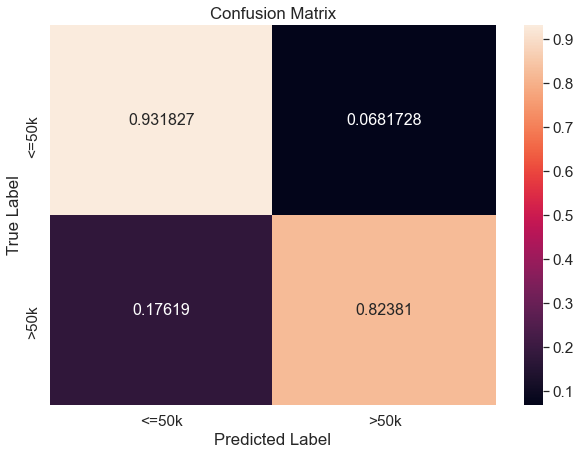

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [30]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(log_reg, X, y, scoring='accuracy')

/Users/shrutibathia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shrutibathia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

### Predict on Data with Unseen Labels

In [ ]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]